# Data Analysis



**Input:** `data/cleaned_data/cleaned_data_wokua.csv`

**Output:** `data/analyzed_data/analyzed_data_workua.pdf`

## Imports

In [2]:
import os

if not os.path.exists("requirements.txt"):
    os.chdir("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Data upload

In [4]:
df = pd.read_csv("data/cleaned_data/cleaned_data_workua.csv")

df.head()

,specialization,title,company,location,office,remote,years_of_experience,min_salary,max_salary,avg_salary,...,Тестування api,Тестування мобільних застосунків,Тестування пз,Уважність,Уміння аналізувати,Уміння мотивувати,Управління командою,Фінансове планування,Цілеспрямованість,Чесність
0,python,Python Developer,"Будыкин С.А., ФЛП",Unknown,0,1,0.0,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
1,python,Senior Python Engineer,UKEESS Software House,Unknown,0,1,5.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,python,"Вчитель з програмування (створення ігор, вебро...",ITishniki school,Unknown,0,1,1.0,10000.0,20000.0,15000.0,...,0,0,0,0,0,1,0,0,0,0
3,python,Програміст для розробки інтерфейсів вимірюваль...,"Новотест, ООО",Дніпро,1,0,0.0,40000.0,80000.0,60000.0,...,0,0,0,0,0,0,0,0,0,0
4,python,Python developer (FastAPI),Halo Lab,Unknown,0,1,1.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


The dataset contains vacancies about ukrainian job market from the work.ua platform and includes:
- general information (title, company, work format);
- experience requirements;
- salary ranges;
- binary skill indicators (hard + soft skills);

## General analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Columns: 303 entries, specialization to Чесність
dtypes: float64(4), int64(295), object(4)
memory usage: 248.7+ KB


In [6]:
df.describe(include="all")

,specialization,title,company,location,office,remote,years_of_experience,min_salary,max_salary,avg_salary,...,Тестування api,Тестування мобільних застосунків,Тестування пз,Уважність,Уміння аналізувати,Уміння мотивувати,Управління командою,Фінансове планування,Цілеспрямованість,Чесність
count,105,105,105,105,105.000000,105.000000,103.000000,51.000000,51.000000,51.000000,...,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
unique,3,87,91,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,python,Python Developer,"Logika, школа програмування та англійської мов...",Unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,64,5,5,54,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.485714,0.514286,1.077670,35167.137255,64571.431373,49869.284314,...,0.019048,0.009524,0.009524,0.076190,0.009524,0.009524,0.019048,0.009524,0.019048,0.028571
std,NaN,NaN,NaN,NaN,0.502193,0.502193,1.311258,23678.218302,45130.125111,32635.534347,...,0.137348,0.097590,0.097590,0.266575,0.097590,0.097590,0.137348,0.097590,0.137348,0.167398
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,6000.000000,12000.000000,9000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,18000.000000,30000.000000,23750.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,25000.000000,50000.000000,40000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,1.000000,1.000000,2.000000,50000.000000,96271.500000,72500.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


The dataset consists of:
- 105 vacancies
- 303 columns, of which:
  - 10 — metadata
  - 290 — skills (0/1)

## Salary analysis

In [7]:
df[["min_salary", "max_salary", "avg_salary"]].describe()

,min_salary,max_salary,avg_salary
count,51.000000,51.000000,51.000000
mean,35167.137255,64571.431373,49869.284314
std,23678.218302,45130.125111,32635.534347
min,6000.000000,12000.000000,9000.000000
25%,18000.000000,30000.000000,23750.000000
50%,25000.000000,50000.000000,40000.000000
75%,50000.000000,96271.500000,72500.000000
max,100000.000000,200000.000000,135000.000000


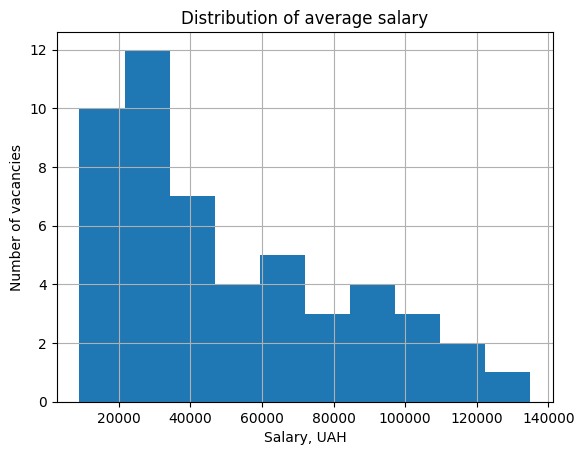

In [8]:
plt.figure()
df["avg_salary"].dropna().hist()
plt.title("Distribution of average salary")
plt.xlabel("Salary, UAH")
plt.ylabel("Number of vacancies")
plt.show()

Salary distribution is asymmetrical:

- the majority of vacancies: 20–45 thousand UAH
- there is a long "tail" up to 130+ thousand UAH


This indicates:

- a significant difference between Junior/Middle and Senior
- the presence of niche high-income positions

## Experience analysis

In [13]:
experience_distribution["Share (%)"] = (
    experience_distribution["Number of Vacancies"]
    / experience_distribution["Number of Vacancies"].sum()
    * 100
).round(2)

experience_distribution

,Years of Experience,Number of Vacancies,Share (%)
0,0.0,42,40.78
1,1.0,32,31.07
2,2.0,22,21.36
3,5.0,7,6.80


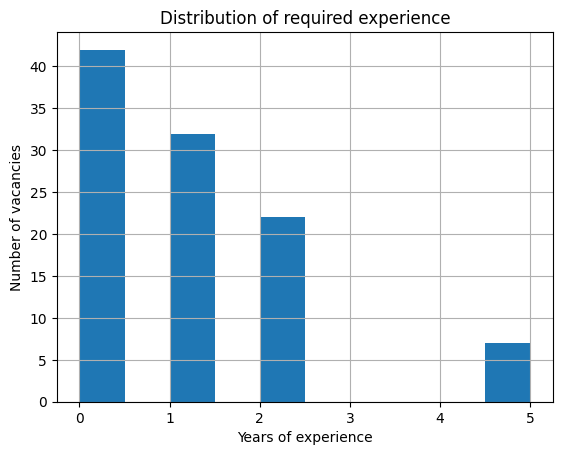

In [14]:
plt.figure()
df["years_of_experience"].dropna().hist()
plt.title("Distribution of required experience")
plt.xlabel("Years of experience")
plt.ylabel("Number of vacancies")
plt.show()

The table shows that the Python job market is heavily focused on early-career professionals.
Positions requiring **0–2 years of experience** account for the majority of vacancies, indicating strong demand
for Junior and early Middle-level developers.

Senior-level roles (5+ years of experience) are significantly fewer, which is typical for the job market and
reflects higher entry barriers and more specialized requirements.

## Work format analysis

In [17]:
work_format_table["Share (%)"] = (
    work_format_table["Number of Vacancies"]
    / work_format_table["Number of Vacancies"].sum()
    * 100
).round(2)

work_format_table

,Work Format,Number of Vacancies,Share (%)
0,remote,54,51.43
1,office,51,48.57


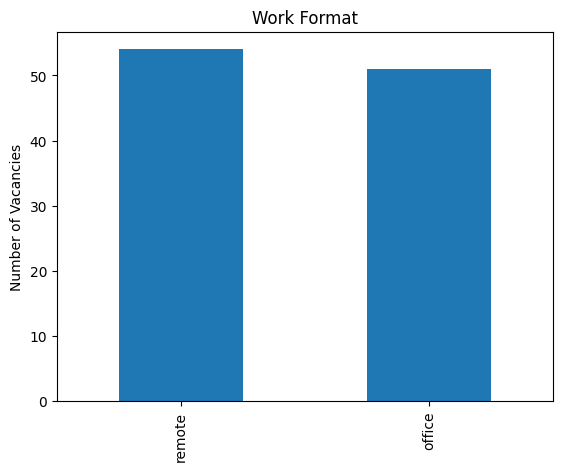

In [18]:
plt.figure()
work_format.plot(kind="bar")
plt.title("Work Format")
plt.ylabel("Number of Vacancies")
plt.show()

The table shows an almost equal distribution between **remote** and **office-based** positions.
This indicates that the Python job market offers a high degree of flexibility and is well-adapted
to remote-first and hybrid work models.

Such balance makes Python roles accessible to a wider pool of candidates regardless of geographic location.

## Skills analysis

In [21]:
top_skills_table = (
    df[skill_columns]
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
)

top_skills_table.columns = [
    "Skill",
    "Number of Vacancies"
]

top_skills_table["Share (%)"] = (
    top_skills_table["Number of Vacancies"]
    / df.shape[0]
    * 100
).round(2)

top_skills_table


,Skill,Number of Vacancies,Share (%)
0,Python,60,57.14
1,Javascript,40,38.10
2,Git,31,29.52
3,Docker,30,28.57
4,Відповідальність,29,27.62
5,Rest api,27,25.71
6,Postgresql,26,24.76
7,Rest,25,23.81
8,Робота з базою даних,23,21.90
9,Програмування,23,21.90


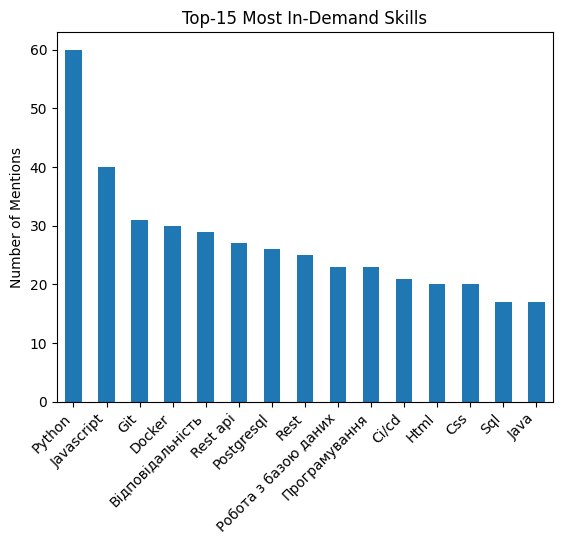

In [22]:
plt.figure()
skill_frequency.head(15).plot(kind="bar")
plt.title("Top-15 Most In-Demand Skills")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=45, ha="right")
plt.show()

This table presents the most frequently required skills across Python vacancies.
Python is a mandatory requirement in all postings, while complementary skills such as
JavaScript, Git, Docker, and SQL significantly increase employability.

The presence of DevOps tools and soft skills among top requirements highlights the growing
demand for versatile, production-ready developers.


## Correlation analysis

In [23]:
salary_skill_corr_table = (
    pd.Series({
        skill: df[[skill, "avg_salary"]].corr().iloc[0, 1]
        for skill in skill_columns
    })
    .dropna()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

salary_skill_corr_table.columns = [
    "Skill",
    "Salary Correlation"
]

salary_skill_corr_table["Salary Correlation"] = (
    salary_skill_corr_table["Salary Correlation"].round(3)
)

salary_skill_corr_table

,Skill,Salary Correlation
0,Openai,0.433
1,Solid principles,0.429
2,Pytest,0.382
3,Ci/cd,0.378
4,Kotlin,0.373
5,Retrofit,0.373
6,Recyclerview,0.373
7,Okhttp,0.373
8,Jetpack compose,0.373
9,Charles,0.373


This table shows the skills that have the strongest positive correlation with average salary.
These skills are typically associated with senior-level responsibilities: Openai, Ci/cd, Kotlin.

While correlation does not imply causation, the results indicate which competencies
are commonly present in higher-paying roles.

## Clustering

In [25]:
cluster_summary_table = (
    cluster_features
    .groupby("Cluster")
    .agg(
        Vacancies=("Cluster", "count"),
        Avg_Experience=("years_of_experience", "mean"),
        Avg_Salary=("avg_salary", "mean")
    )
    .round(2)
    .reset_index()
)

cluster_summary_table

,Cluster,Vacancies,Avg_Experience,Avg_Salary
0,0,27,0.48,25392.59
1,1,8,2.75,94216.69
2,2,14,0.71,66928.57


Based on experience requirements and salary levels, the clustering analysis revealed three distinct market segments:

- Cluster 0 — Entry-Level / Junior
This cluster represents the mass segment of the Python job market.
Vacancies in this group typically require **around 0.5 years of experience** and offer an
average salary of approximately **25,000 UAH**.
These roles are primarily focused on foundational development tasks and are well-suited
for entry-level candidates starting their careers.

###### 🔹 Cluster 2 — High-Paying Junior / Middle
This cluster includes vacancies with relatively low experience requirements
(**around 0.7 years on average**) but significantly higher compensation
(**approximately 67,000 UAH**).
Such roles often appear in **remote-first teams, startups**, or projects that demand
a broader technical skill set, including **FastAPI, DevOps tools, and production-oriented practices**.
This segment represents accelerated career opportunities for highly skilled junior or early middle developers.

###### 🔹 Cluster 1 — Salary-Driven Senior-like (High-Paying Middle)
Although this cluster offers the highest average salary (**around 94,000 UAH**),
the average experience requirement remains moderate (**approximately 2.7 years**).
These positions typically involve **higher responsibility, system ownership, and complex problem-solving**.
However, due to the relatively low experience threshold, this segment does **not represent a classical Senior level**.
Instead, it reflects a **high-paying Middle-level market segment** driven by skill intensity rather than years of experience.